## Monte Carlo f-Average Integration
 - April 5, 2024

This tutorial will numerically evaluate a definite integral using the Monte Carlo f-Average method.

In [14]:
# Import basic Python modules
import numpy as np
import matplotlib.pyplot as plt

In all Monte Carlo simulations, it is necessary to generate random or pseudo-random numbers.  The Python command ```np.random.uniform()``` from the NumPy module generates random numbers uniformly distributed between zero and one. 

In the cell below, we use this command to generate a single sample.

In [15]:
np.random.uniform()

0.42667909491690825

To confirm that the numbers generated are uniformly distribted on the interval $[0, 1]$, we can generate a long list of these numbers and plot a histogram. ```np.random.uniform(a, b, n)``` returns $n$ random numbers uniformly distributed between $a$ and $b$.

In the cell below, we use this command to generate $10^4$ random numbers between $0$ and $1$.

In [16]:
nos = np.random.uniform(0, 1, int(1e4))

Here's a histogram of the $10^4$ uniformly-distributed random numbers. 

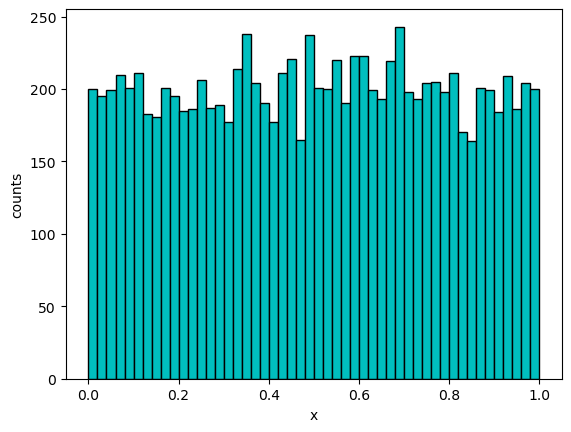

In [17]:
nbins = 50
plt.hist(nos, nbins, color = 'c', edgecolor = 'k')
plt.xlabel('x');
plt.ylabel('counts');

This tutorial will first attempt to evaluate an integral for which the solution is easily obtained.  This approach has been taken purposely so that we can confirm that our numerical techniques are reliable.  The function that we will integrate is a simple polynomial.  Below, the function is plotted on the interval $x = [0, 1]$ and the exact value of the integral is evaluated over the same interval.  We are going to use this polynomial over and over again in this tutorial, so we define it as a function.

In [18]:
fcn = lambda x : (-65536*x**8 + 262144*x**7 - 409600*x**6 + 311296*x**5 -\
                  114688*x**4 + 16384*x**3)/27

Here's a plot of the function over the interval $0\le x\le 1$.

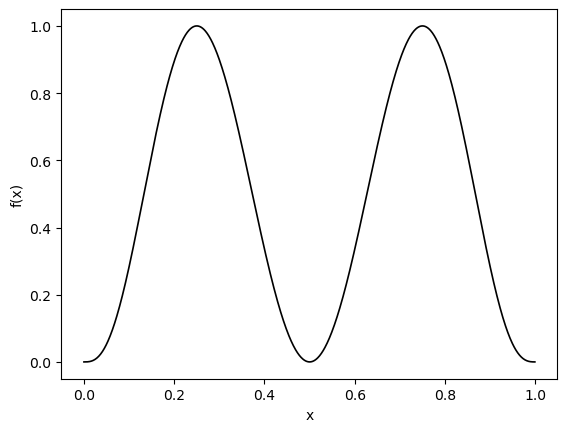

In [19]:
xx = np.arange(0, 1, 0.001)
plt.figure()
plt.plot(xx, fcn(xx), 'k-', linewidth = 1.2)
plt.xlabel('x')
plt.ylabel('f(x)');

Here's how we can use the SymPy module to do symbolic integration in Python.  We first need to import the SymPy module.  We can then evaluate the indefinite integral symbolically.

In [20]:
import sympy as sym
x = sym.Symbol('x')
fint = sym.integrate(fcn(x), x)
fint

-65536*x**9/243 + 32768*x**8/27 - 409600*x**7/189 + 155648*x**6/81 - 114688*x**5/135 + 4096*x**4/27

We can also evaluate the definite integram using SymPy.

In [21]:
fint = sym.integrate(fcn(x), (x, 0, 1))
print(fint)
print('The exact integral of f(x) on 0 < x < 1 is', sym.N(fint))

4096/8505
The exact integral of f(x) on 0 < x < 1 is 0.481599059376837


The $f$-average method requires that we repeatedly generate $x_i$ random numbers ($n$ times) uniformly distributed between the integration interval ($0$ to $1$ in this example).  For each $x_i$ we calculate the corresponding $f(x_i)$ and sum all of these values to find $f_\mathrm{tot}$.  $f_\mathrm{avg}$ is obtained from $f_\mathrm{avg} = f_\mathrm{tot}/n$.  An estimate of the integral $I$ is given by the integration interval $b-a$ multiplied by $f_\mathrm{avg}$: $I = (b - a)f_\mathrm{avg}$.

In [23]:
n = int(1e4) # Set the number of trials
a = 0 # Lower integration limit
b = 1 # Upper integration limit
xx = np.random.uniform(a, b, n) # Generate n random samples of x_i
fList = fcn(xx) # Calculate the f(x) at each value of x
ftot = sum(fList) # Sum all of the f(x) values in fList
I = (b - a)*ftot/n # Calculate the value of favg.  In this case, the interval (b - a) = 1
print('The f-average estimate of the integral of f(x) on 0 < x < 1 is', I)

The f-average estimate of the integral of f(x) on 0 < x < 1 is 0.4836010517286435


In the plot below, we show each of the $f(x_i)$ values and $f_{\mathrm{avg}}$. The square area below the red line is approximately equal to the area beneath the blue curve which is the integral that we're trying to evaluate.

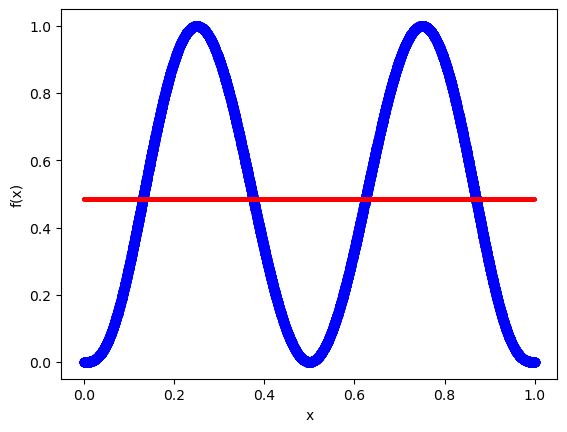

In [24]:
plt.plot(xx, fList, 'bo', fillstyle = 'none')
plt.plot(xx, I*np.ones(n), 'r-', linewidth = 3)
plt.xlabel('x')
plt.ylabel('f(x)');

If you don't need to keep track of the actual coordinates of each $(x, f(x))$, then you can get away with a more compact block of code that only calculates $f_\mathrm{tot}$.

In [25]:
n = int(1e4) # Set the number of trials
a = 0 # Lower integration limit
b = 1 # Upper integration limit
xx = np.random.uniform(a, b, n) # Generate n random samples of x_i
ftot = sum(fcn(xx)) # Calculate the sum of f(x_i) for all i = 1 .. n
I = (b - a)*ftot/n # Estimate the value of the integral 
print('The f-average estimate of the integral of f(x) on 0 < x < 1 is', I)

The f-average estimate of the integral of f(x) on 0 < x < 1 is 0.4732177449523899


Now we will numberically approximate the integral using $n = 10,000$ five thousand times and plot the resulting distribution of our determination of the integral.  The distribution is expected to be Gaussian.

To keep track of how long this block of codes takes to complete, we'll use the ```datetime.now()``` function to display the time before and after the loop.

2024-04-10 18:27:32.924390
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
2024-04-10 18:27:55.761406


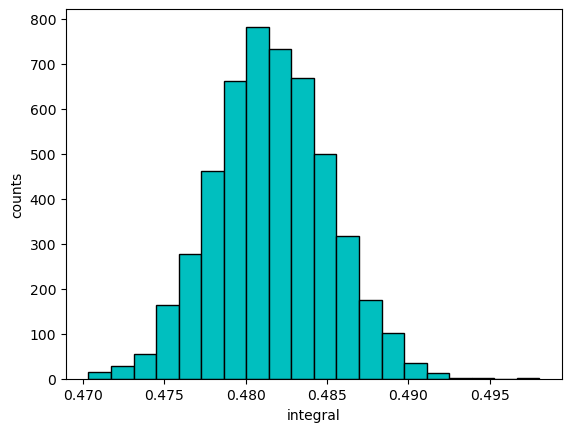

In [26]:
from datetime import datetime
print(datetime.now()) # Start time
n = int(1e4) # Set the value of n
m = int(5e3) # Estimate the value of the integral m times
a = 0 # Lower integration limit
b = 1 # Upper integration limit
intList = [] # Prepare an empty list to store the values of I
for j in range(m):
    if j % int(m/10) == 0:
        print(int(j/(m/100)), '%', sep = '')
    xx = np.random.uniform(a, b, n) # Generate n random samples of x_i
    ftot = sum(fcn(xx)) # Calculate the sum of f(x_i) for all i = 1 .. n
    intList = intList + [(b - a)*ftot/n]
print(datetime.now())
plt.figure()
nbins = 20
plt.hist(intList, nbins, color = 'c', edgecolor = 'k')
plt.xlabel('integral')
plt.ylabel('counts');

The width of the distribution can be calculated from the standard deviation of the list of $5000$ approximations of the integral and is an estimate in the uncertainty of our determination of the definite integral.

The standard deviation can be calculated easily using the statistics module.

In [13]:
import statistics
statistics.stdev(intList)

0.0035677166212645193

Finally, the last thing we'll attempt to do is to understand how our uncertainly (standard deviation) depends on $n$.  So far, all of our calculations have used $n = 10^4$.  Now we'll determine the standard deviation for values of $n$ that range from $100$ to $10^5$.  This block of code took my laptop about 18 minutes to complete... If you've got a lot time to kill, trying running the same code in Maple!

In [39]:
print(datetime.now()) # Start time
nList = [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5] # List of n values
a = 0 # Lower integration limit
b = 1 # Upper integration limit
sigmaList = [] # Set up an empty list that will be used to store the sigma values
for k in range(len(nList)): 
    intList = [] # Set up an empty list to store the values of I
    print(k+1, 'of', len(nList)) 
    n = int(nList[k])
    for j in range(m):
        xx = np.random.uniform(a, b, n) # Generate n random samples of x_i
        ftot = sum(fcn(xx)) # Calculate the sum of f(x_i) for all i = 1 .. n
        intList = intList + [(b - a)*ftot/n] # Add the I values to the appropriate list
    sigmaList = sigmaList + [statistics.stdev(intList)] # Calculate the standard deviation and add it to the appropriate list
print(datetime.now()) # End time

2024-04-05 13:09:59.655056
1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10
2024-04-05 13:14:47.859982


Below we plot the uncertainty in the numerical integral estimation as a function of $n$ (the number of trials in the Monte Carlo simulation). As expected, the uncertainty decreases as the number of trials increases. The $\sigma$ values are proportional to $1/\sqrt{n}$.

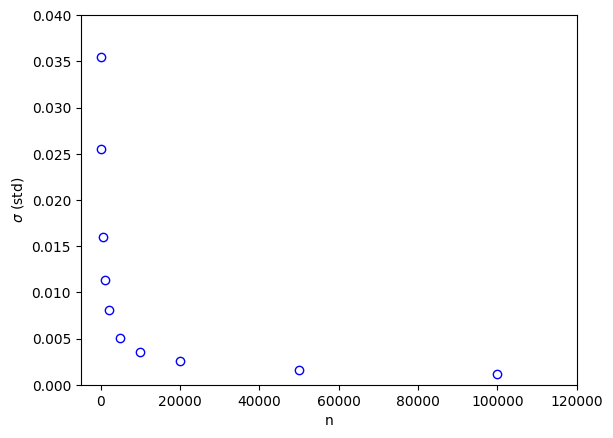

In [40]:
plt.plot(nList, sigmaList, 'bo', fillstyle = 'none')
plt.xlabel('n')
plt.ylabel(r'$\sigma$ (std)')
plt.axis((-5e3, 1.2e5, 0, 0.04));

To get a better appreciation of the dependence of $\sigma$ on $n$, below we plot $\sigma$ as a function of $1/\sqrt{n}$ and observe the linear relationship between the two.  Beautiful!  All of this generated from uniformly distributed random numbers!  Take a moment to reflect on what we've accomplished.  We've used Monte Carlo simulations to study the behaviour of Monte Carlo simulations!  The objective of a Monte Carlo calculation is always to study the characteristics of some system (often a physical system) by simulating data using random numbers.

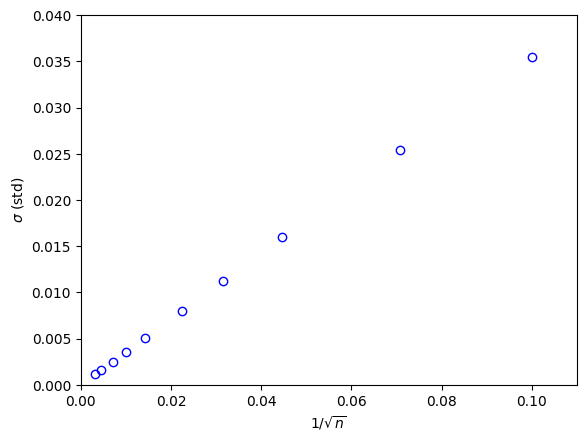

In [41]:
plt.plot(1/np.sqrt(nList), sigmaList, 'bo', fillstyle = 'none')
plt.xlabel(r'$1/\sqrt{n}$')
plt.ylabel(r'$\sigma$ (std)')
plt.axis((0, .11, 0, 0.04));